In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

import nltk 
nltk.download('stopwords')
nltk.download('punkt')
import string
from nltk.corpus import stopwords

stops = set(stopwords.words('english'))

import re


from nltk.tokenize import word_tokenize
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import Sequential

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\intel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\intel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
import pandas as pd
import gzip

def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield eval(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

In [4]:
beauty_df = getDF('reviews_Beauty_5 (1).json.gz')

In [5]:
cellphone_df = getDF('reviews_Cell_Phones_and_Accessories_5.json.gz')

In [6]:
grocery_df = getDF('reviews_Grocery_and_Gourmet_Food_5 (1).json.gz')

In [7]:
home_df = getDF('reviews_Home_and_Kitchen_5 (1).json.gz')

In [8]:
sports_df = getDF('reviews_Sports_and_Outdoors_5.json.gz')

In [9]:
beauty_df

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A1YJEY40YUW4SE,7806397051,Andrea,"[3, 4]",Very oily and creamy. Not at all what I expect...,1.0,Don't waste your money,1391040000,"01 30, 2014"
1,A60XNB876KYML,7806397051,Jessica H.,"[1, 1]",This palette was a decent price and I was look...,3.0,OK Palette!,1397779200,"04 18, 2014"
2,A3G6XNM240RMWA,7806397051,Karen,"[0, 1]",The texture of this concealer pallet is fantas...,4.0,great quality,1378425600,"09 6, 2013"
3,A1PQFP6SAJ6D80,7806397051,Norah,"[2, 2]",I really can't tell what exactly this thing is...,2.0,Do not work on my face,1386460800,"12 8, 2013"
4,A38FVHZTNQ271F,7806397051,Nova Amor,"[0, 0]","It was a little smaller than I expected, but t...",3.0,It's okay.,1382140800,"10 19, 2013"
...,...,...,...,...,...,...,...,...,...
198497,A2BLFCOPSMBOZ9,B00LLPT4HI,Dave Edmiston,"[0, 0]",Just a little dab of this shea butter should b...,5.0,A little dab...,1405468800,"07 16, 2014"
198498,A1UQBFCERIP7VJ,B00LLPT4HI,Margaret Picky,"[0, 0]",This shea butter is completely raw and unrefin...,5.0,Pure organic raw shea butter,1405296000,"07 14, 2014"
198499,A35Q0RBM3YNQNF,B00LLPT4HI,M. Hill,"[0, 0]",The skin is the body's largest organ and it ab...,5.0,One Pound Organic Grade A Unrefined Shea Butter,1405468800,"07 16, 2014"
198500,A3LGT6UZL99IW1,B00LLPT4HI,"Richard C. Drew ""Anaal Nathra/Uthe vas Bethod...","[0, 0]",I have very dry elbows and knees. I have a to...,5.0,This stuff is amazing!,1405382400,"07 15, 2014"


In [10]:
sports_df

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,AIXZKN4ACSKI,1881509818,David Briner,"[0, 0]",This came in on time and I am veru happy with ...,5.0,Woks very good,1390694400,"01 26, 2014"
1,A1L5P841VIO02V,1881509818,Jason A. Kramer,"[1, 1]",I had a factory Glock tool that I was using fo...,5.0,Works as well as the factory tool,1328140800,"02 2, 2012"
2,AB2W04NI4OEAD,1881509818,J. Fernald,"[2, 2]",If you don't have a 3/32 punch or would like t...,4.0,"It's a punch, that's all.",1330387200,"02 28, 2012"
3,A148SVSWKTJKU6,1881509818,"Jusitn A. Watts ""Maverick9614""","[0, 0]",This works no better than any 3/32 punch you w...,4.0,It's a punch with a Glock logo.,1328400000,"02 5, 2012"
4,AAAWJ6LW9WMOO,1881509818,Material Man,"[0, 0]",I purchased this thinking maybe I need a speci...,4.0,"Ok,tool does what a regular punch does.",1366675200,"04 23, 2013"
...,...,...,...,...,...,...,...,...,...
296332,A2XX2A4OJCDNLZ,B00LFPS0CY,RatherLiveInKeyWest,"[2, 3]",This is a water bottle done right. It is a ver...,5.0,Hydracentials Sporty 25 Oz Stainless Steel Wat...,1405036800,"07 11, 2014"
296333,A3LGT6UZL99IW1,B00LFPS0CY,"Richard C. Drew ""Anaal Nathra/Uthe vas Bethod...","[0, 0]",If you're looking for an insulated water bottl...,5.0,"Large, incredibly well made water bottle!",1405641600,"07 18, 2014"
296334,ASKZO80Z1RKTR,B00LFPS0CY,Robin Lee,"[0, 0]","This Hydracentials Sporty 25 OZ, double insula...",5.0,"""Great Water Bottle For Hot Day""......",1405900800,"07 21, 2014"
296335,APRNS6DB68LLV,B00LFPS0CY,"Rob Slaven ""slavenrm@gmail. com""","[1, 1]",As usual I received this item free in exchange...,5.0,A pretty impressive water bottle. Best I've s...,1405900800,"07 21, 2014"


In [11]:
beauty_df = beauty_df[['reviewText','summary']]

In [12]:
beauty_df['category'] = 'Beauty'

C:\Users\intel\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
cellphone_df = cellphone_df[['reviewText','summary']]
cellphone_df['category'] = 'cellphone'

In [14]:
grocery_df = grocery_df[['reviewText','summary']]
grocery_df['category'] = 'grocery'

In [15]:
home_df = home_df[['reviewText','summary']]
home_df['category'] = 'home'

In [16]:
sports_df = sports_df[['reviewText','summary']]
sports_df['category'] = 'sports'

C:\Users\intel\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [17]:
df = pd.concat([beauty_df,cellphone_df,grocery_df,home_df,sports_df])

In [18]:
df

,reviewText,summary,category
0,Very oily and creamy. Not at all what I expect...,Don't waste your money,Beauty
1,This palette was a decent price and I was look...,OK Palette!,Beauty
2,The texture of this concealer pallet is fantas...,great quality,Beauty
3,I really can't tell what exactly this thing is...,Do not work on my face,Beauty
4,"It was a little smaller than I expected, but t...",It's okay.,Beauty
...,...,...,...
296332,This is a water bottle done right. It is a ver...,Hydracentials Sporty 25 Oz Stainless Steel Wat...,sports
296333,If you're looking for an insulated water bottl...,"Large, incredibly well made water bottle!",sports
296334,"This Hydracentials Sporty 25 OZ, double insula...","""Great Water Bottle For Hot Day""......",sports
296335,As usual I received this item free in exchange...,A pretty impressive water bottle. Best I've s...,sports


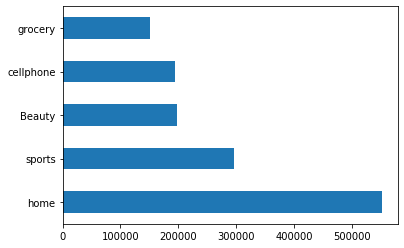

In [19]:
df['category'].value_counts().plot(kind='barh')

In [20]:
df['category'].value_counts().min()

151254

In [21]:
df['category'].value_counts()

home         551682
sports       296337
Beauty       198502
cellphone    194439
grocery      151254
Name: category, dtype: int64

In [22]:
df.drop_duplicates(inplace=True)

In [23]:
df.shape

(1391985, 3)

In [24]:
df = df.groupby('category').head(150000)

In [25]:
df.shape

(750000, 3)

In [26]:
df['reviewText'] = df[['reviewText','summary']].apply(lambda x :' '.join(x),axis=1)

C:\Users\intel\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [27]:
df['reviewText'].iloc[0]

"Very oily and creamy. Not at all what I expected... ordered this to try to highlight and contour and it just looked awful!!! Plus, took FOREVER to arrive. Don't waste your money"

In [28]:
df.drop('summary',axis=1,inplace=True)

C:\Users\intel\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [29]:
df

,reviewText,category
0,Very oily and creamy. Not at all what I expect...,Beauty
1,This palette was a decent price and I was look...,Beauty
2,The texture of this concealer pallet is fantas...,Beauty
3,I really can't tell what exactly this thing is...,Beauty
4,"It was a little smaller than I expected, but t...",Beauty
...,...,...
150014,"This is a Fine butane, it works just like you ...",sports
150015,This lighter fluid burns extra clean and has s...,sports
150016,This is a bit more expensive than the generic ...,sports
150017,"Believe it or not, the quality of the butane r...",sports


In [30]:
# cleaning data

In [31]:
def clean_text(text):
  text = text.lower()
  text = re.sub('[^a-z]',' ',text)
  text = re.sub('http\S+',' ',text,flags=re.MULTILINE)# multiline removes the http in multiple lines
  text = re.sub('\.+',' ',text)
  word_token = word_tokenize(text)
  text = [words for words in word_token if words not in stops]
  text = [words for words in text if words not in string.punctuation]
  return ' '.join(text)

In [32]:
sentence = 'i am learning nlp hahaha.... it is fun to  work with it , i am 22 years old'

In [33]:
clean_text(sentence)

'learning nlp hahaha fun work years old'

In [34]:
df['cleaned_text'] = df['reviewText'].apply(lambda x : clean_text(x))

C:\Users\intel\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [35]:
df['cleaned_text']

0         oily creamy expected ordered try highlight con...
1         palette decent price looking different shades ...
2         texture concealer pallet fantastic great cover...
3         really tell exactly thing powder kind oil ish ...
4         little smaller expected okay lasted long time ...
                                ...                        
150014    fine butane works like would expect fine sure ...
150015    lighter fluid burns extra clean saved lighter ...
150016    bit expensive generic butane getting big box s...
150017    believe quality butane really matter performan...
150018    works great delta survival lighter fires first...
Name: cleaned_text, Length: 750000, dtype: object

In [36]:
df

,reviewText,category,cleaned_text
0,Very oily and creamy. Not at all what I expect...,Beauty,oily creamy expected ordered try highlight con...
1,This palette was a decent price and I was look...,Beauty,palette decent price looking different shades ...
2,The texture of this concealer pallet is fantas...,Beauty,texture concealer pallet fantastic great cover...
3,I really can't tell what exactly this thing is...,Beauty,really tell exactly thing powder kind oil ish ...
4,"It was a little smaller than I expected, but t...",Beauty,little smaller expected okay lasted long time ...
...,...,...,...
150014,"This is a Fine butane, it works just like you ...",sports,fine butane works like would expect fine sure ...
150015,This lighter fluid burns extra clean and has s...,sports,lighter fluid burns extra clean saved lighter ...
150016,This is a bit more expensive than the generic ...,sports,bit expensive generic butane getting big box s...
150017,"Believe it or not, the quality of the butane r...",sports,believe quality butane really matter performan...


In [37]:
df.drop('reviewText',axis=1,inplace=True)

C:\Users\intel\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [38]:
category = {'Beauty':0,'sports':1,'cellphone':2,'home':3,'grocery':4}

In [39]:
df['category'] = df['category'].map(category)

C:\Users\intel\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [40]:
df

,category,cleaned_text
0,0,oily creamy expected ordered try highlight con...
1,0,palette decent price looking different shades ...
2,0,texture concealer pallet fantastic great cover...
3,0,really tell exactly thing powder kind oil ish ...
4,0,little smaller expected okay lasted long time ...
...,...,...
150014,1,fine butane works like would expect fine sure ...
150015,1,lighter fluid burns extra clean saved lighter ...
150016,1,bit expensive generic butane getting big box s...
150017,1,believe quality butane really matter performan...


In [41]:
# we have categories

In [42]:
train_beauty = df[df['category']==0][:120000] #selectin 120000 entries from each category

In [43]:
train_sports = df[df['category']==1][:120000]

In [44]:
train_cellphone = df[df['category']==2][:120000]

In [45]:
train_home = df[df['category']==3][:120000]

In [46]:
train_grocery = df[df['category']==4][:120000]

In [47]:
test_beauty = df[df['category']==0][120000:]

In [48]:
test_sports = df[df['category']==1][120000:]

In [49]:
test_cellphone = df[df['category']==2][120000:]

In [50]:
test_home = df[df['category']==3][120000:]

In [51]:
test_grocery = df[df['category']==4][120000:]

In [52]:
train_df = pd.concat([train_beauty,train_sports,train_cellphone,train_home,train_grocery])

In [53]:
test_df = pd.concat([test_beauty,test_sports,test_cellphone,test_home,test_grocery])

In [54]:
train_df

,category,cleaned_text
0,0,oily creamy expected ordered try highlight con...
1,0,palette decent price looking different shades ...
2,0,texture concealer pallet fantastic great cover...
3,0,really tell exactly thing powder kind oil ish ...
4,0,little smaller expected okay lasted long time ...
...,...,...
120004,4,wife loves keurig hate waste k cups product re...
120005,4,coffee use time go coffee first thing morning ...
120006,4,far best french roast coffee yet really full f...
120007,4,husband absolutely loved probably soon peggy


In [55]:
test_df

,category,cleaned_text
120008,0,nu brilliance kit came nice case everything ne...
120009,0,pretty disappointed machine real microdermabra...
120010,0,carefully watching instructional dvd min long ...
120011,0,using last month positive results sensitive sk...
120012,0,great tool beauty arsenal comes instructional ...
...,...,...
150006,4,happy healthier alternative brands popcorn fla...
150007,4,three ultra fine powder packaged shaker top pa...
150008,4,love three spicy seasonings stove top popcorn ...
150009,4,seasonings bit dry dusty grainy like salt espe...


In [56]:
train = train_df.sample(frac=1.0) # suffling the train 

In [99]:
train['cleaned_text'][0]

0    came time veru happy haved used already makes ...
0    another flavor kit kat taste unique bit differ...
0    daughter wanted book price amazon best already...
0    oily creamy expected ordered try highlight con...
0    look good stick good like rounded shape always...
Name: cleaned_text, dtype: object

In [100]:
x_train.head()

4845      asian hair medium thickness hair uncurls get s...
92385     sending back description says gel seat hard ro...
92206     less half almost much come learn understand ye...
40716     bought weeks ago high hopes came zero instruct...
117125    bought new microwave old sharp cuft microwave ...
Name: cleaned_text, dtype: object

In [101]:
test = test_df.sample(frac=1.0)

In [102]:
x_train = train['cleaned_text']

In [103]:
x_test = test['cleaned_text']

In [104]:
y_train = train['category']

In [105]:
y_test = test['category']

In [106]:
tokenizer = Tokenizer(oov_token='<unk>')

In [107]:
tokenizer.fit_on_texts(x_train)

In [108]:
word_index = tokenizer.word_index

In [109]:
len(word_index)

179913

In [110]:
vocab_size = len(word_index) +1

In [111]:
vocab_size

179914

(array([220209., 248630., 113397.,  61471.,  35511.,  22009.,  14030.,
          9501.,   6385.,   4736.]),
 array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180., 200.]),
 <a list of 10 Patch objects>)

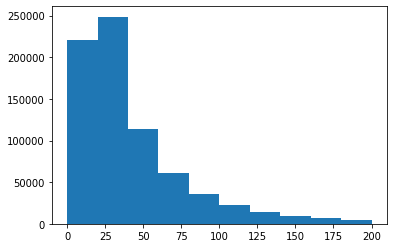

In [112]:
plt.hist(df['cleaned_text'].apply(lambda x : len(x.split())),range=(0,200))

In [113]:
plt.show()

In [114]:
# padding

In [115]:

max_length = 80
embedding_dimension = 300
truncating_type = 'post'
padding_type = 'post'

In [116]:
train_sequences = tokenizer.texts_to_sequences(x_train)

In [117]:
test_sequences = tokenizer.texts_to_sequences(x_test)

In [118]:
word_index['red']

273

In [119]:
print(train_sequences[0])

[2704, 22, 562, 1718, 22, 53018, 10, 146, 441, 19, 241, 26, 902, 5, 59, 57, 3523, 5, 176, 31, 100, 22, 31]


In [120]:
print(x_train[0])

0    came time veru happy haved used already makes ...
0    another flavor kit kat taste unique bit differ...
0    daughter wanted book price amazon best already...
0    oily creamy expected ordered try highlight con...
0    look good stick good like rounded shape always...
Name: cleaned_text, dtype: object


In [121]:
len(train_sequences[0])

23

In [122]:
len(x_train[0])

5

In [123]:
train_padded = pad_sequences(train_sequences,maxlen=max_length,padding=padding_type,truncating=truncating_type)

In [124]:
test_padded = pad_sequences(test_sequences,maxlen=max_length,padding=padding_type,truncating=truncating_type)

In [125]:
train_padded[0]

array([ 2704,    22,   562,  1718,    22, 53018,    10,   146,   441,
          19,   241,    26,   902,     5,    59,    57,  3523,     5,
         176,    31,   100,    22,    31,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0])

In [126]:
len(train_padded[0])

80

In [127]:
rev_word_index = dict([(value,key) for (key,value) in word_index.items()])

In [128]:
rev_word_index[273]

'red'

In [129]:
def decode_sentence(number):
    return ' '.join([rev_word_index.get(i,'?') for i in number])

In [130]:
decode_sentence(train_padded[0])

'asian hair medium thickness hair uncurls get side head used ones better lasted one day without sprays one might work fine hair work ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?'

In [131]:
#Model building

In [134]:
lstm_model = Sequential([
    
    tf.keras.layers.Embedding(vocab_size,embedding_dimension),
    tf.keras.layers.LSTM(128),
    tf.keras.layers.Dense(100,activation = 'relu'),
    tf.keras.layers.Dense(5,activation = 'softmax')
    
    
    
    
    
    
])


In [135]:
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 300)         53974200  
_________________________________________________________________
lstm (LSTM)                  (None, 128)               219648    
_________________________________________________________________
dense (Dense)                (None, 100)               12900     
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 505       
Total params: 54,207,253
Trainable params: 54,207,253
Non-trainable params: 0
_________________________________________________________________


In [136]:
opt = tf.keras.optimizers.Adam(0.01)

In [137]:
lstm_model.compile(optimizer=opt,loss='sparse_categorical_crossentropy',metrics= ['accuracy'])

In [138]:
num_epochs = 3

In [140]:
history = lstm_model.fit(train_padded,y_train,epochs=3,validation_data=(test_padded,y_test),batch_size = 1000)

Epoch 1/3
600/600 [==============================] - 1760s 3s/step - loss: 0.4772 - accuracy: 0.8121 - val_loss: 0.2395 - val_accuracy: 0.9198
Epoch 2/3
600/600 [==============================] - 1822s 3s/step - loss: 0.1598 - accuracy: 0.9471 - val_loss: 0.2145 - val_accuracy: 0.9286
Epoch 3/3
600/600 [==============================] - 1732s 3s/step - loss: 0.1190 - accuracy: 0.9603 - val_loss: 0.2278 - val_accuracy: 0.9266


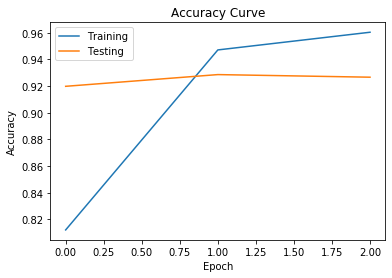

In [141]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title('Accuracy Curve')
plt.legend(['Training','Testing'],loc="best")


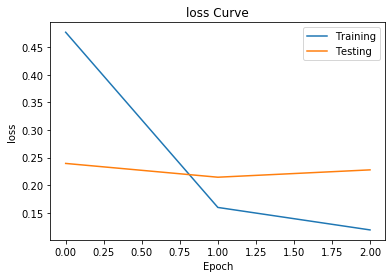

In [149]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("Epoch")
plt.ylabel("loss")
plt.title('loss Curve')
plt.legend(['Training','Testing'],loc="best")

In [146]:
lstm_model.save('LSTM_Model.h5')

In [155]:
import pickle

In [156]:
with open('tokenizer.pickle','wb') as handle:   #save it in a notepad
    pickle.dump(tokenizer,handle,protocol = pickle.HIGHEST_PROTOCOL)

In [162]:
with open('tokenizer.pickle','rb') as pr:   #save it in a notepad
    load_tokenizer = pickle.load(pr)

In [163]:
test = ['asian hair medium thickness hair uncurls get side head used ones better lasted one day without sprays one might work fine hair work']

In [164]:
test_to_sequences = load_tokenizer.texts_to_sequences(test)

In [165]:
test_to_sequences

[[2704,
  22,
  562,
  1718,
  22,
  53018,
  10,
  146,
  441,
  19,
  241,
  26,
  902,
  5,
  59,
  57,
  3523,
  5,
  176,
  31,
  100,
  22,
  31]]

In [167]:
test_padded_sequence = pad_sequences(test_to_sequences,maxlen = 80 ,padding = 'post',truncating = 'post')


In [168]:
new_model = tf.keras.models.load_model('./LSTM_Model.h5')

In [169]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 300)         53974200  
_________________________________________________________________
lstm (LSTM)                  (None, 128)               219648    
_________________________________________________________________
dense (Dense)                (None, 100)               12900     
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 505       
Total params: 54,207,253
Trainable params: 54,207,253
Non-trainable params: 0
_________________________________________________________________


In [170]:
pred = new_model.predict(test_padded_sequence)

In [171]:
pred #softmax

array([[9.9786395e-01, 1.2550434e-03, 7.0455659e-05, 1.5747815e-04,
        6.5321423e-04]], dtype=float32)

In [ ]:
#category = {'Beauty':0,'sports':1,'cellphone':2,'home':3,'grocery':4}

In [172]:
labels = list(category.keys())

In [173]:
labels

['Beauty', 'sports', 'cellphone', 'home', 'grocery']

In [174]:
labels[np.argmax(pred)]

'Beauty'